[Watch the YouTube Video](https://www.youtube.com/watch?v=8z5jsznoB0A) <p>

![Description of the graphic](graphic.jpg) <p>
[All Data availible here](https://opendata.minneapolismn.gov/)


In [56]:
import pandas as pd
import plotly.express as px

# Step 1: Load the data
df_2022 = pd.read_csv('Police_Incidents_2022.csv')
df_2023 = pd.read_csv('Police_Incidents_2023.csv')

In [57]:
# Filter columns and offenses for 2022 dataset
df_mod_2022 = df_2022[df_2022['offense'].isin(['JHOMIC', 'MURDR'])][['caseNumber', 'precinct', 'reportedDate', 'offense', 'description']]

# Filter columns and offenses for 2023 dataset
df_mod_2023 = df_2023[df_2023['offense'].isin(['JHOMIC', 'MURDR'])][['caseNumber', 'precinct', 'reportedDate', 'offense', 'description']]

df_mod_2023.info()
df_mod_2022.info()




<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 727 to 25037
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   caseNumber    70 non-null     object
 1   precinct      70 non-null     object
 2   reportedDate  70 non-null     object
 3   offense       70 non-null     object
 4   description   70 non-null     object
dtypes: object(5)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 3040 to 22165
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   caseNumber    80 non-null     object
 1   precinct      80 non-null     object
 2   reportedDate  80 non-null     object
 3   offense       80 non-null     object
 4   description   80 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [58]:
df_mod_2023.info()
df_mod_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 727 to 25037
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   caseNumber    70 non-null     object
 1   precinct      70 non-null     object
 2   reportedDate  70 non-null     object
 3   offense       70 non-null     object
 4   description   70 non-null     object
dtypes: object(5)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 3040 to 22165
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   caseNumber    80 non-null     object
 1   precinct      80 non-null     object
 2   reportedDate  80 non-null     object
 3   offense       80 non-null     object
 4   description   80 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [71]:
import pandas as pd

# Step 1: Ensure 'reportedDate' is in datetime format and remove timezone
df_mod_2022['reportedDate'] = pd.to_datetime(df_mod_2022['reportedDate'], errors='coerce').dt.tz_localize(None)
df_mod_2023['reportedDate'] = pd.to_datetime(df_mod_2023['reportedDate'], errors='coerce').dt.tz_localize(None)

# Filter data for dates starting from January 1 in both datasets
df_mod_2022 = df_mod_2022[df_mod_2022['reportedDate'] >= '2022-01-01']
df_mod_2023 = df_mod_2023[df_mod_2023['reportedDate'] >= '2023-01-01']

# Verify that the counts are still correct at this stage
print(f"Total rows in 2022 after filtering: {df_mod_2022.shape[0]}")  # Should be 70
print(f"Total rows in 2023 after filtering: {df_mod_2023.shape[0]}")  # Should be 80

# Step 2: Group by the 'reportedDate' and count occurrences for both years
daily_counts_2022 = df_mod_2022.groupby(df_mod_2022['reportedDate'].dt.date).size()
daily_counts_2023 = df_mod_2023.groupby(df_mod_2023['reportedDate'].dt.date).size()

# Ensure that the counts sum to 70 for 2022 and 80 for 2023 before proceeding
print(f"Total crimes in 2022: {daily_counts_2022.sum()}")  # Should be 70
print(f"Total crimes in 2023: {daily_counts_2023.sum()}")  # Should be 80

# Step 3: Create a date range for the full year
date_range_2022 = pd.date_range(start='2022-01-01', end='2022-12-31')
date_range_2023 = pd.date_range(start='2023-01-01', end='2023-12-31')

# Step 4: Reindex the daily counts to ensure all dates are represented, filling missing days with 0
daily_counts_2022 = daily_counts_2022.reindex(date_range_2022, fill_value=0)
daily_counts_2023 = daily_counts_2023.reindex(date_range_2023, fill_value=0)

# Step 5: Calculate cumulative sums for the entire year
cumulative_homicides_2022 = daily_counts_2022.cumsum()
cumulative_homicides_2023 = daily_counts_2023.cumsum()

# Step 6: Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Date': date_range_2022,
    'Daily Crime 2022': daily_counts_2022.values,   # Daily counts
    'Daily Crime 2023': daily_counts_2023.values    # Daily counts
})

# Calculate cumulative crimes for display in the same DataFrame
comparison_df['Cumulative Crime 2022'] = cumulative_homicides_2022.values
comparison_df['Cumulative Crime 2023'] = cumulative_homicides_2023.values

# Step 7: Calculate percentage difference (handle division by zero)
comparison_df['% Difference'] = comparison_df.apply(
    lambda row: ((row['Cumulative Crime 2023'] - row['Cumulative Crime 2022']) / row['Cumulative Crime 2022'] * 100)
    if row['Cumulative Crime 2022'] > 0 else (100 if row['Cumulative Crime 2023'] > 0 else 0), axis=1)

# Step 8: Verify the output
print(comparison_df)


Total rows in 2022 after filtering: 17
Total rows in 2023 after filtering: 12
Total crimes in 2022: 17
Total crimes in 2023: 12
          Date  Daily Crime 2022  Daily Crime 2023  Cumulative Crime 2022  \
0   2022-01-01                 0                 1                      0   
1   2022-01-02                 0                 0                      0   
2   2022-01-03                 0                 0                      0   
3   2022-01-04                 0                 0                      0   
4   2022-01-05                 0                 0                      0   
..         ...               ...               ...                    ...   
360 2022-12-27                 0                 0                     17   
361 2022-12-28                 0                 0                     17   
362 2022-12-29                 0                 0                     17   
363 2022-12-30                 0                 0                     17   
364 2022-12-31           

In [60]:
import pandas as pd

# Assume df_mod_2022 and df_mod_2023 are already filtered to include relevant data

# Ensure 'reportedDate' is in datetime format and remove timezone (if needed)
df_mod_2022['reportedDate'] = pd.to_datetime(df_mod_2022['reportedDate']).dt.tz_localize(None)
df_mod_2023['reportedDate'] = pd.to_datetime(df_mod_2023['reportedDate']).dt.tz_localize(None)

# Filter data for the first 90 days (Jan 1 to March 31) in both datasets
end_date_2022 = pd.Timestamp('2022-03-31')
end_date_2023 = pd.Timestamp('2023-03-31')

df_mod_2022 = df_mod_2022[df_mod_2022['reportedDate'] <= end_date_2022]
df_mod_2023 = df_mod_2023[df_mod_2023['reportedDate'] <= end_date_2023]

# Step 1: Group by the 'reportedDate' and count occurrences
daily_counts_2022 = df_mod_2022.groupby(df_mod_2022['reportedDate'].dt.date).size()
daily_counts_2023 = df_mod_2023.groupby(df_mod_2023['reportedDate'].dt.date).size()

# Step 2: Create a date range for the first 90 days
date_range_2022 = pd.date_range(start='2022-01-01', end='2022-03-31')
date_range_2023 = pd.date_range(start='2023-01-01', end='2023-03-31')

# Step 3: Reindex the daily counts to fill missing days with 0 murders
daily_counts_2022 = daily_counts_2022.reindex(date_range_2022, fill_value=0)
daily_counts_2023 = daily_counts_2023.reindex(date_range_2023, fill_value=0)

# Step 4: Calculate the cumulative sum for each day
cumulative_homicides_2022 = daily_counts_2022.cumsum()
cumulative_homicides_2023 = daily_counts_2023.cumsum()

# Step 5: Create a DataFrame with the first 15 days
comparison_15_days_df = pd.DataFrame({
    'Day': range(1, 16),  # First 15 days
    'Cumulative Murders 2022': cumulative_homicides_2022.values[:15],
    'Cumulative Murders 2023': cumulative_homicides_2023.values[:15]
})

# Step 6: Calculate percentage difference (handle division by zero)
comparison_15_days_df['Percentage Difference'] = comparison_15_days_df.apply(
    lambda row: ((row['Cumulative Murders 2023'] - row['Cumulative Murders 2022']) / row['Cumulative Murders 2022'] * 100)
    if row['Cumulative Murders 2022'] > 0 else (100 if row['Cumulative Murders 2023'] > 0 else 0), axis=1)

# Display the result
print(comparison_15_days_df)


    Day  Cumulative Murders 2022  Cumulative Murders 2023  \
0     1                        0                        1   
1     2                        0                        1   
2     3                        0                        1   
3     4                        0                        1   
4     5                        0                        1   
5     6                        0                        1   
6     7                        0                        1   
7     8                        1                        1   
8     9                        1                        1   
9    10                        1                        1   
10   11                        1                        2   
11   12                        1                        3   
12   13                        1                        4   
13   14                        2                        4   
14   15                        2                        4   

    Percentage Differen

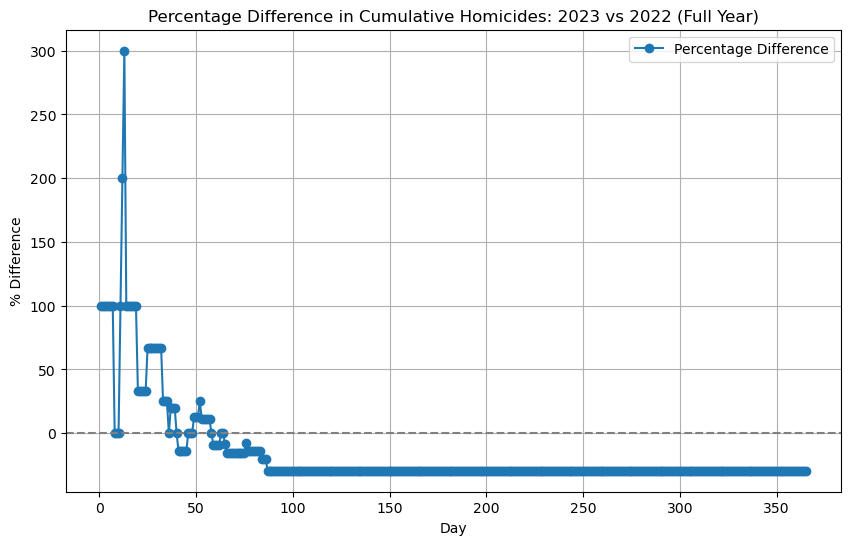

     Day  Cumulative Murders 2022  Cumulative Murders 2023  \
0      1                        0                        1   
1      2                        0                        1   
2      3                        0                        1   
3      4                        0                        1   
4      5                        0                        1   
..   ...                      ...                      ...   
360  361                       17                       12   
361  362                       17                       12   
362  363                       17                       12   
363  364                       17                       12   
364  365                       17                       12   

     Percentage Difference  
0               100.000000  
1               100.000000  
2               100.000000  
3               100.000000  
4               100.000000  
..                     ...  
360             -29.411765  
361             -29.411

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_mod_2022 and df_mod_2023 are already filtered to include relevant data

# Ensure 'reportedDate' is in datetime format and remove timezone (if needed)
df_mod_2022['reportedDate'] = pd.to_datetime(df_mod_2022['reportedDate']).dt.tz_localize(None)
df_mod_2023['reportedDate'] = pd.to_datetime(df_mod_2023['reportedDate']).dt.tz_localize(None)

# Filter data for the entire year (Jan 1 to Dec 31) in both datasets
end_date_2022 = pd.Timestamp('2022-12-31')
end_date_2023 = pd.Timestamp('2023-12-31')

df_mod_2022 = df_mod_2022[df_mod_2022['reportedDate'] <= end_date_2022]
df_mod_2023 = df_mod_2023[df_mod_2023['reportedDate'] <= end_date_2023]

# Step 1: Group by the 'reportedDate' and count occurrences
daily_counts_2022 = df_mod_2022.groupby(df_mod_2022['reportedDate'].dt.date).size()
daily_counts_2023 = df_mod_2023.groupby(df_mod_2023['reportedDate'].dt.date).size()

# Step 2: Create a date range for the full year
date_range_2022 = pd.date_range(start='2022-01-01', end='2022-12-31')
date_range_2023 = pd.date_range(start='2023-01-01', end='2023-12-31')

# Step 3: Reindex the daily counts to fill missing days with 0 murders
daily_counts_2022 = daily_counts_2022.reindex(date_range_2022, fill_value=0)
daily_counts_2023 = daily_counts_2023.reindex(date_range_2023, fill_value=0)

# Step 4: Calculate the cumulative sum for each day
cumulative_homicides_2022 = daily_counts_2022.cumsum()
cumulative_homicides_2023 = daily_counts_2023.cumsum()

# Step 5: Create a DataFrame for the entire year
comparison_year_df = pd.DataFrame({
    'Day': range(1, 366),  # Full year (365 days)
    'Cumulative Murders 2022': cumulative_homicides_2022.values,
    'Cumulative Murders 2023': cumulative_homicides_2023.values
})

# Step 6: Calculate percentage difference (handle division by zero)
comparison_year_df['Percentage Difference'] = comparison_year_df.apply(
    lambda row: ((row['Cumulative Murders 2023'] - row['Cumulative Murders 2022']) / row['Cumulative Murders 2022'] * 100)
    if row['Cumulative Murders 2022'] > 0 else (100 if row['Cumulative Murders 2023'] > 0 else 0), axis=1)

# Step 7: Visualize the percentage difference over the entire year
plt.figure(figsize=(10, 6))
plt.plot(comparison_year_df['Day'], comparison_year_df['Percentage Difference'], label='Percentage Difference', marker='o')
plt.title('Percentage Difference in Cumulative Homicides: 2023 vs 2022 (Full Year)')
plt.xlabel('Day')
plt.ylabel('% Difference')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0%
plt.grid(True)
plt.legend()
plt.show()

# Display the comparison DataFrame for the full year
print(comparison_year_df)


In [31]:
# Calculate the values for the entire year and identify the day where the percentage difference is the maximum negative value
df_2022 = pd.read_csv('Police_Incidents_2022.csv')
df_2023 = pd.read_csv('Police_Incidents_2023.csv')
# Step 1: Recalculate the cumulative homicides for the full year
cumulative_homicides_2022_full = cumulative_homicides_2022.cumsum()  # Already cumulative, so safe to use
cumulative_homicides_2023_full = cumulative_homicides_2023.cumsum()

# Step 2: Create a DataFrame for the entire year
comparison_full_year_df = pd.DataFrame({
    'Day': range(1, len(cumulative_homicides_2022_full) + 1),  # Assuming both series have the same length
    'Cumulative Murders 2022': cumulative_homicides_2022_full,
    'Cumulative Murders 2023': cumulative_homicides_2023_full
})

# Step 3: Calculate the percentage difference for each day (handle division by zero)
comparison_full_year_df['Percentage Difference'] = comparison_full_year_df.apply(
    lambda row: ((row['Cumulative Murders 2023'] - row['Cumulative Murders 2022']) / row['Cumulative Murders 2022'] * 100)
    if row['Cumulative Murders 2022'] > 0 else (100 if row['Cumulative Murders 2023'] > 0 else 0), axis=1)

# Step 4: Identify the day with the maximum negative percentage difference
max_negative_diff_day = comparison_full_year_df['Percentage Difference'].idxmin()
max_negative_diff_value = comparison_full_year_df.loc[max_negative_diff_day, 'Percentage Difference']

# Step 5: Plot the percentage differences for the entire year
plt.figure(figsize=(10, 6))
plt.plot(comparison_full_year_df['Day'], comparison_full_year_df['Percentage Difference'], label='Percentage Difference', marker='o')
plt.title('Percentage Difference in Cumulative Homicides: 2023 vs 2022 (Full Year)')
plt.xlabel('Day')
plt.ylabel('% Difference')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0%
plt.grid(True)
plt.legend()

# Mark the point of maximum negative percentage difference
plt.scatter([max_negative_diff_day + 1], [max_negative_diff_value], color='red', zorder=5)
plt.text(max_negative_diff_day + 1, max_negative_diff_value, f"Day {max_negative_diff_day + 1}\n{max_negative_diff_value:.2f}%", 
         horizontalalignment='left', verticalalignment='bottom', color='red')

plt.show()

# Display the day and value of the maximum negative percentage difference
max_negative_diff_day + 1, max_negative_diff_value  # Add 1 to display the correct day (not index)


ValueError: array length 365 does not match index length 730